In [1]:
import sys
sys.path.append("../")

import numpy as np 
import pandas as pd
import DataLoader as dl

import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

from sklearn import metrics
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
loader = dl.Data()
digits = loader.loadData('Emnist', 'Digits')

# Get x and y from data
x = loader.getX(digits)
y = loader.getY(digits)

## Explore data

5


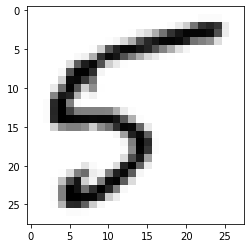

In [3]:
num = 1920
pic = x[num].reshape((28,28))

print(y[num])
plt.imshow(pic, cmap=plt.cm.binary)
plt.show()

## Binarization

In [4]:
bin = np.copy(x) 

threshold, upper, lower = 60, 1, 0
bin = np.where(bin>threshold, upper, lower)

## Training

In [5]:
x_train, x_test, y_train, y_test = train_test_split(bin, y, test_size = 0.1, random_state = 0)

In [6]:
clf = MixedNB(categorical_features="all")
clf.fit(x_train, y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

MixedNB(alpha=0.5, var_smoothing=1e-09)

## Mean Time for predictions

In [7]:
import time

real = []
progress = []
prediction = []

for i in range(1, x_test.shape[0]):
    try:
        start = time.time()
        prediction.append(clf.predict(x_test[(i-1):i])[0])
        real.append(y_test[(i-1):i][0])
        end = time.time()
        progress.append(end - start)
    except: 
        continue

In [8]:
display(HTML(f'<h2>Accuracy Score: {accuracy_score(real, prediction)}</h2>'))

## Mean Time

In [9]:
mean = np.array(progress)
mean = np.mean(mean)
display(HTML(f'<h2>Prediction Mean time: {mean*1000} ms</h2>'))